In [11]:
import os
from dotenv import load_dotenv
import requests
import pandas as pd

load_dotenv()
api_key = os.getenv("API_FOOTBALL_KEY")

In [12]:
headers = {
    "x-apisports-key": api_key
}

In [ ]:
//試合結果
url = "https://v3.football.api-sports.io/fixtures?league=39&season=2023"  # プレミアリーグの例
headers = {
    "x-apisports-key": api_key
}

response = requests.get(url, headers=headers)
data = response.json()

In [38]:
fixtures = data['response']
df = pd.json_normalize(fixtures)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fixture.id              380 non-null    int64  
 1   fixture.referee         380 non-null    object 
 2   fixture.timezone        380 non-null    object 
 3   fixture.date            380 non-null    object 
 4   fixture.timestamp       380 non-null    int64  
 5   fixture.periods.first   380 non-null    int64  
 6   fixture.periods.second  380 non-null    int64  
 7   fixture.venue.id        373 non-null    float64
 8   fixture.venue.name      380 non-null    object 
 9   fixture.venue.city      380 non-null    object 
 10  fixture.status.long     380 non-null    object 
 11  fixture.status.short    380 non-null    object 
 12  fixture.status.elapsed  380 non-null    int64  
 13  fixture.status.extra    0 non-null      object 
 14  league.id               380 non-null    in

In [32]:
df.columns

Index(['fixture.id', 'fixture.referee', 'fixture.timezone', 'fixture.date',
       'fixture.timestamp', 'fixture.periods.first', 'fixture.periods.second',
       'fixture.venue.id', 'fixture.venue.name', 'fixture.venue.city',
       'fixture.status.long', 'fixture.status.short', 'fixture.status.elapsed',
       'fixture.status.extra', 'league.id', 'league.name', 'league.country',
       'league.logo', 'league.flag', 'league.season', 'league.round',
       'league.standings', 'teams.home.id', 'teams.home.name',
       'teams.home.logo', 'teams.home.winner', 'teams.away.id',
       'teams.away.name', 'teams.away.logo', 'teams.away.winner', 'goals.home',
       'goals.away', 'score.halftime.home', 'score.halftime.away',
       'score.fulltime.home', 'score.fulltime.away', 'score.extratime.home',
       'score.extratime.away', 'score.penalty.home', 'score.penalty.away'],
      dtype='object')

In [31]:
df.head()

,fixture.id,fixture.referee,fixture.timezone,fixture.date,fixture.timestamp,fixture.periods.first,fixture.periods.second,fixture.venue.id,fixture.venue.name,fixture.venue.city,...,goals.home,goals.away,score.halftime.home,score.halftime.away,score.fulltime.home,score.fulltime.away,score.extratime.home,score.extratime.away,score.penalty.home,score.penalty.away
0,1035037,C. Pawson,UTC,2023-08-11T19:00:00+00:00,1691780400,1691780400,1691784000,512.0,Turf Moor,Burnley,...,0,3,0,2,0,3,None,None,None,None
1,1035038,M. Oliver,UTC,2023-08-12T11:30:00+00:00,1691839800,1691839800,1691843400,494.0,Emirates Stadium,London,...,2,1,2,0,2,1,None,None,None,None
2,1035039,P. Bankes,UTC,2023-08-12T14:00:00+00:00,1691848800,1691848800,1691852400,504.0,Vitality Stadium,"Bournemouth, Dorset",...,1,1,0,0,1,1,None,None,None,None
3,1035041,S. Attwell,UTC,2023-08-12T14:00:00+00:00,1691848800,1691848800,1691852400,8560.0,Goodison Park,Liverpool,...,0,1,0,0,0,1,None,None,None,None
4,1035040,D. Coote,UTC,2023-08-12T14:00:00+00:00,1691848800,1691848800,1691852400,508.0,The American Express Community Stadium,"Falmer, East Sussex",...,4,1,1,0,4,1,None,None,None,None


In [ ]:
fixtures = data['response']
df = pd.json_normalize(fixtures)

# 必要な列を抽出
df_filtered = df[["fixture.date", "teams.home.name", "teams.away.name", "goals.home", "goals.away"]]
df_filtered["fixture.date"] = pd.to_datetime(df_filtered["fixture.date"])

df_filtered.head()


C:\Users\tkaki\AppData\Local\Temp\ipykernel_11252\1816220850.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["fixture.date"] = pd.to_datetime(df_filtered["fixture.date"])


,fixture.date,teams.home.name,teams.away.name,goals.home,goals.away
0,2023-08-11 19:00:00+00:00,Burnley,Manchester City,0,3
1,2023-08-12 11:30:00+00:00,Arsenal,Nottingham Forest,2,1
2,2023-08-12 14:00:00+00:00,Bournemouth,West Ham,1,1
3,2023-08-12 14:00:00+00:00,Everton,Fulham,0,1
4,2023-08-12 14:00:00+00:00,Brighton,Luton,4,1


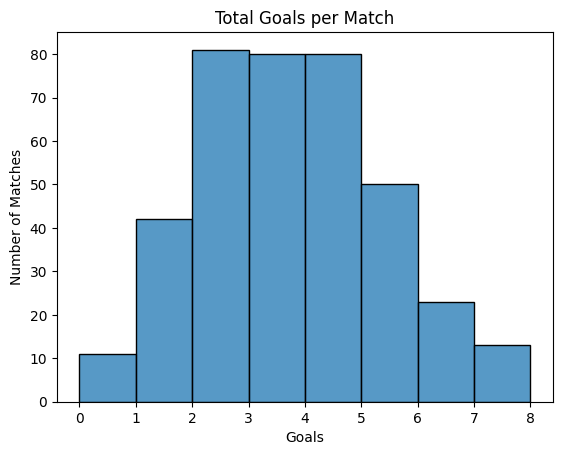

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# 総得点のヒストグラム
df_filtered["total_goals"] = df_filtered["goals.home"] + df_filtered["goals.away"]
sns.histplot(df_filtered["total_goals"], bins=8)
plt.title("Total Goals per Match")
plt.xlabel("Goals")
plt.ylabel("Number of Matches")
plt.show()

In [36]:
# 全選手
players_search_url = "https://v3.football.api-sports.io/players?league=39&season=2023&page=3"
players_response = requests.get(players_search_url, headers=headers)
players_list = players_response.json()

In [37]:
players = players_list['response']
df_players = pd.json_normalize(players)

In [38]:
df_players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   statistics            20 non-null     object
 1   player.id             20 non-null     int64 
 2   player.name           20 non-null     object
 3   player.firstname      20 non-null     object
 4   player.lastname       20 non-null     object
 5   player.age            20 non-null     int64 
 6   player.birth.date     20 non-null     object
 7   player.birth.place    9 non-null      object
 8   player.birth.country  20 non-null     object
 9   player.nationality    20 non-null     object
 10  player.height         14 non-null     object
 11  player.weight         11 non-null     object
 12  player.injured        20 non-null     bool  
 13  player.photo          20 non-null     object
dtypes: bool(1), int64(2), object(11)
memory usage: 2.2+ KB


In [39]:
df_players

,statistics,player.id,player.name,player.firstname,player.lastname,player.age,player.birth.date,player.birth.place,player.birth.country,player.nationality,player.height,player.weight,player.injured,player.photo
0,"[{'team': {'id': 49, 'name': 'Chelsea', 'logo'...",2276,J. Cumming,James Andrew,Cumming,26,1999-09-04,Winchester,England,England,186 cm,79 kg,False,https://media.api-sports.io/football/players/2...
1,"[{'team': {'id': 36, 'name': 'Fulham', 'logo':...",18751,Ivan Cavaleiro,Ivan Ricardo,Neves Abreu Cavaleiro,32,1993-10-18,Vila Franca de Xira,Portugal,Portugal,175 cm,72 kg,False,https://media.api-sports.io/football/players/1...
2,"[{'team': {'id': 49, 'name': 'Chelsea', 'logo'...",64167,G. Słonina,Gabriel Paweł,Słonina,21,2004-05-15,Addison,USA,USA,193 cm,88 kg,False,https://media.api-sports.io/football/players/6...
3,"[{'team': {'id': 49, 'name': 'Chelsea', 'logo'...",138777,F. Anjorin,Faustino Adebola Rasheed,Anjorin,24,2001-11-23,Poole,England,England,185 cm,73 kg,False,https://media.api-sports.io/football/players/1...
4,"[{'team': {'id': 40, 'name': 'Liverpool', 'log...",162590,T. Morton,Tyler Scott,Morton,23,2002-10-31,Wallasey,England,England,182 cm,75 kg,False,https://media.api-sports.io/football/players/1...
5,"[{'team': {'id': 36, 'name': 'Fulham', 'logo':...",278086,I. Odutayo,Idris Adewale,Olarewaju Odutayo,23,2002-10-26,Lambeth,England,England,None,None,False,https://media.api-sports.io/football/players/2...
6,"[{'team': {'id': 33, 'name': 'Manchester Unite...",282130,Logan Pye,Logan,Pye,22,2003-10-26,None,England,England,None,None,False,https://media.api-sports.io/football/players/2...
7,"[{'team': {'id': 34, 'name': 'Newcastle', 'log...",284305,Jamie Miley,Jamie,Miley,21,2004-01-14,Gateshead,England,England,175 cm,None,False,https://media.api-sports.io/football/players/2...
8,"[{'team': {'id': 36, 'name': 'Fulham', 'logo':...",284471,S. Parkes,Stefan Charles Earl,Parkes,21,2004-03-28,None,England,England,None,None,False,https://media.api-sports.io/football/players/2...
9,"[{'team': {'id': 36, 'name': 'Fulham', 'logo':...",284559,Alexander Paul Borto,Alexander Paul,Borto,22,2003-11-06,None,USA,USA,188 cm,80 kg,False,https://media.api-sports.io/football/players/2...


In [32]:
import os
import requests
import json
import time
from dotenv import load_dotenv

# .envファイルからAPIキーを読み込む
load_dotenv()
api_key = os.getenv("API_FOOTBALL_KEY")

# APIリクエストのヘッダー
headers = {
    "x-apisports-key": api_key
}

# 初期設定
league_id = 39  # プレミアリーグのリーグID
season = 2023   # シーズン
base_url = "https://v3.football.api-sports.io/players"
all_players = []
page = 4

while True:
    params = {
        "league": league_id,
        "season": season,
        "page": page
    }
    response = requests.get(base_url, headers=headers, params=params)
    data = response.json()

    # エラーハンドリング
    if response.status_code != 200 or "response" not in data:
        print(f"エラーが発生しました。ステータスコード: {response.status_code}")
        break

    players = data["response"]
    if not players:
        # データがない場合、ループを終了
        break

    all_players.extend(players)
    print(f"ページ {page} のデータを取得しました。")
    page += 1

    # 無料プランのレート制限に対応するため、リクエスト間に1秒の待機を追加
    time.sleep(6)

# 取得したデータをJSONファイルに保存
with open("premier_league_players_2023.json", "w", encoding="utf-8") as f:
    json.dump(all_players, f, ensure_ascii=False, indent=4)

print("全選手データの取得と保存が完了しました。")


全選手データの取得と保存が完了しました。


In [31]:
data

{'get': 'players/profiles',
 'parameters': {'league': '39', 'season': '2022', 'page': 1},
 'errors': {'league': 'The League field do not exist.',
  'season': 'The Season field do not exist.'},
 'results': 0,
 'paging': {'current': 1, 'total': 1},
 'response': []}

In [30]:
all_players

[]

In [24]:
df_players = pd.json_normalize(all_players)

In [25]:
df_players

,statistics,player.id,player.name,player.firstname,player.lastname,player.age,player.birth.date,player.birth.place,player.birth.country,player.nationality,player.height,player.weight,player.injured,player.photo
0,"[{'team': {'id': 39, 'name': 'Wolves', 'logo':...",54,Diego Costa,Diego,da Silva Costa,37,1988-10-07,Lagarto,Brazil,Spain,188 cm,83 kg,False,https://media.api-sports.io/football/players/5...
1,"[{'team': {'id': 47, 'name': 'Tottenham', 'log...",178,Lucas Moura,Lucas,Rodrigues Moura da Silva,33,1992-08-13,São Paulo,Brazil,Brazil,172 cm,72 kg,False,https://media.api-sports.io/football/players/1...
2,"[{'team': {'id': 40, 'name': 'Liverpool', 'log...",297,A. Oxlade-Chamberlain,Alexander Mark David,Oxlade-Chamberlain,32,1993-08-15,Portsmouth,England,England,180 cm,70 kg,False,https://media.api-sports.io/football/players/2...
3,"[{'team': {'id': 33, 'name': 'Manchester Unite...",888,P. Jones,Phil Anthony,Jones,31,1992-02-21,Preston,England,England,180 cm,71 kg,False,https://media.api-sports.io/football/players/8...
4,"[{'team': {'id': 65, 'name': 'Nottingham Fores...",900,J. Lingard,Jesse Ellis,Lingard,33,1992-12-15,Warrington,England,England,175 cm,62 kg,False,https://media.api-sports.io/football/players/9...
5,"[{'team': {'id': 48, 'name': 'West Ham', 'logo...",2473,M. Lanzini,Manuel,Lanzini,32,1993-02-15,Ituzaingó,Argentina,Argentina,167 cm,59 kg,False,https://media.api-sports.io/football/players/2...
6,"[{'team': {'id': 39, 'name': 'Wolves', 'logo':...",2677,João Moutinho,João Filipe,Iria Santos Moutinho,39,1986-09-08,Portimão,Portugal,Portugal,170 cm,61 kg,False,https://media.api-sports.io/football/players/2...
7,"[{'team': {'id': 39, 'name': 'Wolves', 'logo':...",18753,Adama Traoré,Adama,Traoré Diarra,29,1996-01-25,L'Hospitalet de Llobregat,Spain,Spain,178 cm,86 kg,False,https://media.api-sports.io/football/players/1...
8,"[{'team': {'id': 45, 'name': 'Everton', 'logo'...",18762,T. Davies,Thomas,Davies,27,1998-06-30,Liverpool,England,England,180 cm,70 kg,False,https://media.api-sports.io/football/players/1...
9,"[{'team': {'id': 52, 'name': 'Crystal Palace',...",18849,J. McArthur,James,McFarlane McArthur,36,1987-10-07,Glasgow,Scotland,Scotland,178 cm,75 kg,False,https://media.api-sports.io/football/players/1...


In [50]:
# 選手
# 1. ブライトンのチームIDを取得
team_search_url = "https://v3.football.api-sports.io/teams?search=Brighton"
team_response = requests.get(team_search_url, headers=headers)
team_data = team_response.json()

In [51]:
# チームIDの取得
team_id = None
for team in team_data['response']:
    if team['team']['name'] == "Brighton":
        team_id = team['team']['id']
        break

if team_id is None:
    print("ブライトンのチームIDが見つかりませんでした。")
    exit()

In [ ]:
# Brighton = 51


# 三苫

In [3]:
team_id = 51

In [9]:
# 2. チームの選手一覧から三笘選手のIDを取得
players_url = f"https://v3.football.api-sports.io/players?team={team_id}&season=2023"
players_response = requests.get(players_url, headers=headers)
players_data = players_response.json()

In [ ]:
import json

# players_data を 'players_data.json' というファイルに保存
with open('players_data.json', 'w', encoding='utf-8') as f:
    json.dump(players_data, f, ensure_ascii=False, indent=4)




In [5]:
import json
# JSONファイルを読み込む
with open('brighton_2023.json', 'r', encoding='utf-8') as f:
    data = json.load(f)
    
players_list = []

for player_entry in data['response']:
    player_info = player_entry['player']
    player_dict = {
        'id': player_info.get('id'),
        'name': player_info.get('name'),
        'firstname': player_info.get('firstname'),
        'lastname': player_info.get('lastname'),
        'age': player_info.get('age'),
        'birth_date': player_info.get('birth', {}).get('date'),
        'birth_place': player_info.get('birth', {}).get('place'),
        'birth_country': player_info.get('birth', {}).get('country'),
        'nationality': player_info.get('nationality'),
        'height': player_info.get('height'),
        'weight': player_info.get('weight'),
        'injured': player_info.get('injured'),
        'photo': player_info.get('photo')
    }
    players_list.append(player_dict)


In [8]:
import pandas as pd
df_players = pd.DataFrame(players_list)

In [9]:
df_players

,id,name,firstname,lastname,age,birth_date,birth_place,birth_country,nationality,height,weight,injured,photo
0,18959,Robert Sánchez,Robert,Lynch Sánchez,28,1997-11-18,Cartagena,Spain,Spain,197 cm,90 kg,False,https://media.api-sports.io/football/players/1...
1,19772,A. Connolly,Aaron Anthony,Connolly,25,2000-01-28,Galway,Republic of Ireland,Republic of Ireland,175 cm,73 kg,False,https://media.api-sports.io/football/players/1...
2,48649,A. Zeqiri,Andi Avdi,Zeqiri,26,1999-06-22,Lausanne,Switzerland,Switzerland,185 cm,81 kg,False,https://media.api-sports.io/football/players/4...
3,64304,K. Kozłowski,Kacper Szymon,Kozłowski,22,2003-10-16,Koszalin,Poland,Poland,182 cm,67 kg,False,https://media.api-sports.io/football/players/6...
4,69257,J. Furlong,Walter James,Byrne Furlong,23,2002-06-07,Dublin,Republic of Ireland,Republic of Ireland,178 cm,72 kg,False,https://media.api-sports.io/football/players/6...
5,70747,J. Enciso,Julio César,Enciso Espínola,21,2004-01-23,Caaguazú,Paraguay,Paraguay,173 cm,64 kg,False,https://media.api-sports.io/football/players/7...
6,116117,M. Caicedo,Moisés Isaac,Caicedo Corozo,24,2001-11-02,Santo Domingo,Ecuador,Ecuador,178 cm,73 kg,False,https://media.api-sports.io/football/players/1...
7,129643,E. Ferguson,Evan Joe,Ferguson,21,2004-10-19,Bettystown,Republic of Ireland,Republic of Ireland,183 cm,78 kg,False,https://media.api-sports.io/football/players/1...
8,135775,Ansu Fati,Anssumane,Fati Vieira,23,2002-10-31,Bissau,Guinea-Bissau,Spain,178 cm,66 kg,False,https://media.api-sports.io/football/players/1...
9,137220,A. Moran,Andrew,Moran,22,2003-10-15,Dublin,Republic of Ireland,Republic of Ireland,177 cm,73 kg,False,https://media.api-sports.io/football/players/1...


In [ ]:
# 三笘選手のIDの取得
player_id = None
for player in players_data['response']:
    if player['player']['name'] == "Kaoru Mitoma":
        player_id = player['player']['id']
        break

if player_id is None:
    print("三笘選手のIDが見つかりませんでした。")
    exit()

三笘選手のIDが見つかりませんでした。


: 

In [54]:
# 3. 三笘選手のパフォーマンスデータを取得
player_stats_url = f"https://v3.football.api-sports.io/players?id={player_id}&season=2023"
stats_response = requests.get(player_stats_url, headers=headers)
stats_data = stats_response.json()

# パフォーマンスデータの表示
for stat in stats_data['response']:
    print(f"シーズン: {stat['statistics'][0]['league']['season']}")
    print(f"チーム: {stat['statistics'][0]['team']['name']}")
    print(f"出場試合数: {stat['statistics'][0]['games']['appearences']}")
    print(f"ゴール数: {stat['statistics'][0]['goals']['total']}")
    print(f"アシスト数: {stat['statistics'][0]['goals']['assists']}")
    print(f"パス成功率: {stat['statistics'][0]['passes']['accuracy']}%")
    print(f"シュート数: {stat['statistics'][0]['shots']['total']}")
    print(f"ドリブル成功数: {stat['statistics'][0]['dribbles']['success']}")
    print(f"ファウル数: {stat['statistics'][0]['fouls']['committed']}")
    print(f"イエローカード数: {stat['statistics'][0]['cards']['yellow']}")
    print(f"レッドカード数: {stat['statistics'][0]['cards']['red']}")
    print("-" * 50)

NameError: name 'player_id' is not defined